#📘**Talento Tech: Data Analytics con Python**
#Entrega del Proyecto Final

**Alumno:** Daniel Matías Ozan

**Instructura:** Gisele Gonzalez

**Tutor Pedagógico:** Cristian Urquiza

## ❗ Antes que nada...
Importamos las librerias y creamos las funciones que utilizaremos más adelante.

In [3]:
#Importamos las librerias a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets, fixed
import os
from IPython.display import display
from google.colab import drive

#Hacemos la coneccion a nuestro drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
#Funcion para el Analisis Exploratorio

def analisis_exploratorio(df):
  print("Informacion del DataFrame:\n")
  print(df.info())
  print("\n")
  print("Descripcion estadistica del DataFrame:\n")
  print(df.describe())
  print("\n")
  print("Dimensiones del DataFrame:\n")
  print(df.shape)
  print("\n")
  print("Columnas del DataFrame:\n")
  print(df.columns)
  print("\n")
  print("Tipos de datos del DataFrame:\n")
  print(df.dtypes)
  print("\n")

#Funcion para analizar identificar datos duplicados y nulos
def calidad_datos(df):
  print("Valores Nulos en el Data Frame:\n")
  print(df.isna().sum())
  print("\nDuplicados en el Data Frame:\n")
  print(df.duplicated().sum())

#Funcion para eliminar caracteres no deseados

def normalizar_datos(df):
  for columna in df.columns:
    if df[columna].dtype == 'object':
      df[columna] = df[columna].str.strip()
      df[columna] = df[columna].str.replace('"', '')
      df[columna] = df[columna].str.replace(r"[\u200b\t\r\n]", "", regex=True)
      df[columna] = df[columna].str.replace(" +", " ", regex=True)
      df[columna] = df[columna].str.title()
  return df

#Funcion para normalizar fechas

def normalizar_fechas(df):
  for columna in df.columns:
    if 'fecha' in columna.lower():
      df[columna] = pd.to_datetime(df[columna], errors="coerce", dayfirst=True)
  return df


#Funcion para calcular medidas de tendencia central y de dispercion de una variable de un DF
def estaditica_descrp(df,columna):
  datos = df[columna]
  if datos.dtype == 'float64':
    prom = round(datos.mean(),2)
    mediana = round(datos.median(),2)
    moda = round(datos.mode(),2)
    var = round(datos.var(),2)
    std =  round(datos.std(),2)
    max = round(datos.max(),2)
    min = round(datos.min(),2)
    q1 = datos.quantile(0.25)
    q3 = datos.quantile(0.75)
    iqr = q3 - q1
    print("-------------------------------------------")
    print(f"ESTADISTICA DESCRITIVA: variable {columna}")
    print("-------------------------------------------\n")
    print(f"Tipo de Variable: Cuantitativa")
    print(f"Promedio: {prom:,.2f}")
    print(f"Mediana: {mediana:,.2f}")
    print(f"Moda: {moda.tolist()}")
    print(f"Varianza: {var:,.2f}")
    print(f"Desviacion estandar: {std:,.2f}")
    print(f"El Rango encuentra entre {min:,.2f} y {max:,.2f}")
    print(f"Rango Interquantilico: {round(iqr,2):,.2f}")
  elif datos.dtype == 'object':
    print("-------------------------------------------")
    print(f"ESTADISTICA DESCRITIVA: variable {columna}")
    print("-------------------------------------------\n")
    print(f"Tipo de Variable: Cualitativa")
    print(f"Cantidad de Categorias: {datos.nunique()}\n")
    print(datos.unique(),"\n")
    print(f"Moda: {datos.mode().tolist()}","\n")
    print("Principales Productos (Frecuencia):")
    top_5_participacion = datos.value_counts(normalize=True).head(5)
    for producto, porcentaje in top_5_participacion.items():
      print(f"  -{producto}: {porcentaje:.1%}")


#Funcion para graficar ventas y marketing

def grafico_marketing_ventas(ventas, marketing ,nombre_producto):
  ventas_prod = ventas[ventas['producto'] == nombre_producto]
  mkt_prod = marketing[marketing['producto'] == nombre_producto]

  fig = px.line(ventas_prod, x='fecha_venta', y='ingreso',
                  title=f'Ventas y Campañas: {nombre_producto}',
                  labels={"ingreso": "Ingreso por venta ($)", "fecha_venta" : "Fecha"},
                  markers=True,
                )
  for index, row in mkt_prod.iterrows():

        if row['canal'] == 'Tv': color_fondo = "Green"
        elif row['canal'] == 'Rrss': color_fondo = "red"
        else: color_fondo = "Orange"

        fig.add_vrect(
            x0=row['fecha_inicio'], x1=row['fecha_fin'],
            fillcolor=color_fondo,
            opacity=0.25,
            layer="below",
            line_width=0,
            annotation_text=row['canal'],
            annotation_position="top left" )

  fig.show()

## 🧩🧹 Recopilación, Preparación, Preprocesamiento y Limpieza de Datos

### 1️⃣ Carga de datos

In [5]:
#Listamos los archivos cargados en la carpeta "datasets"
mis_datasets = '/content/drive/MyDrive/datasets'
lista_csv = os.listdir(mis_datasets)
print(lista_csv) #Revisamos los nombres de los archivos para asegurarnos que están tipieados correctamente

['ventas.csv', 'clientes.csv', 'marketing.csv', 'marketing_clean.csv', 'clientes_clean.csv', 'ventas_clean.csv']


In [6]:
#Cargamos los archivos solicitados en la actividad: Ventas, Clientes y Marketing
ventas = pd.read_csv(f'{mis_datasets}/ventas.csv')
clientes = pd.read_csv(f'{mis_datasets}/clientes.csv')
marketing = pd.read_csv(f'{mis_datasets}/marketing.csv')

In [7]:
#Visualisamos los primeros datos de las tablas cargadas

print("Tabla Ventas: \n", ventas.head(),"\n")

print("Tabla Clientes:\n" ,clientes.head(),"\n")

print("Tabla Marketing:\n" ,marketing.head())

Tabla Ventas: 
    id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro decorativo   $69.94       5.0  02/01/2024   
1       811    Lámpara de mesa  $105.10       5.0  02/01/2024   
2      1156           Secadora   $97.96       3.0  02/01/2024   
3      1372           Heladera  $114.35       8.0  02/01/2024   
4      1546           Secadora  $106.21       4.0  02/01/2024   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos   

Tabla Clientes:
    id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar del Plata  42294.68
1           2  Kristina Scaplehorn    25        Posadas  24735.04
2           3       Filip Castagne    50    Resistencia  35744.85
3           4          Liuka Luard    39   Bahía Blanca  27647.96
4           5        Dore Cockshtt    28        Rosario  28245.65 

Tabla Marketing:
    id_campanha      

### 2️⃣ Análisis exploratorio inicial

In [8]:
#Analisis Exploratorio Ventas

analisis_exploratorio(ventas)

Informacion del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB
None


Descripcion estadistica del DataFrame:

          id_venta     cantidad
count  3035.000000  3033.000000
mean   1499.851400     6.496538
std     866.465379     3.457250
min       1.000000     1.000000
25%     748.500000     3.000000
50%    1502.000000     7.000000
75%    2249.500000     9.000000
max    3000.000000    12.000000


Dimensiones del DataFrame:

(3035, 6)


Columnas del DataFrame:

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_vent

In [9]:
#Analisis Exploratorio Clientes

analisis_exploratorio(clientes)

Informacion del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB
None


Descripcion estadistica del DataFrame:

       id_cliente        edad      ingresos
count  567.000000  567.000000    567.000000
mean   284.000000   37.940035  34668.739012
std    163.823075   10.202885  12974.531446
min      1.000000   20.000000    170.290000
25%    142.500000   30.000000  26015.240000
50%    284.000000   37.000000  35066.830000
75%    425.500000   43.000000  42457.100000
max    567.000000   81.000000  88053.010000


Dimensiones del DataFrame:

(567, 5)


Columnas del DataFrame:

Index(['i

In [10]:
#Analisis Exploratorio Marketing

analisis_exploratorio(marketing)

Informacion del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB
None


Descripcion estadistica del DataFrame:

       id_campanha      costo
count    90.000000  90.000000
mean     45.500000   4.928667
std      26.124701   0.947750
min       1.000000   2.950000
25%      23.250000   4.372500
50%      45.500000   4.900000
75%      67.750000   5.562500
max      90.000000   7.390000


Dimensiones del DataFrame:

(90, 6)


Columnas del DataFrame:

Index(['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio',
       'fecha_

**Comentarios:**

Las tablas fueron cargadas con exito. Pero se observa que multiples columnas de los data frames presentan como tipo de dato `object` cuando deberian ser de otro tipo. Esto puede indicar que hay un problema de calidad de datos. Por lo que se deberia analizar eso antes de pasar a analisis posteriores.

### 3️⃣ Calidad de los datos

In [11]:
calidad_datos(ventas)

Valores Nulos en el Data Frame:

id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Duplicados en el Data Frame:

35


In [12]:
calidad_datos(clientes)

Valores Nulos en el Data Frame:

id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Duplicados en el Data Frame:

0


In [13]:
calidad_datos(marketing)

Valores Nulos en el Data Frame:

id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Duplicados en el Data Frame:

0


**Comentarios:**

Se observan datos duplicados y nulos en el data frame de Ventas.
Especificamente se identifican datos nulos en las columnas precios y cantidad. Y 35 datos duplicados.

### 4️⃣ Limpieza de datos

In [14]:
#Eliminacion de duplicados
ventas = ventas.drop_duplicates()
clientes = clientes.drop_duplicates()
marketing = marketing.drop_duplicates()

In [15]:
#Normalizamos datos
ventas_clean = normalizar_datos(ventas)
clientes_clean = normalizar_datos(clientes)
marketing_clean = normalizar_datos(marketing)

In [16]:
#Normalizamos fechas

ventas_clean = normalizar_fechas(ventas_clean)
clientes_clean = normalizar_fechas(clientes_clean)
marketing_clean = normalizar_fechas(marketing_clean)

In [17]:
#Eliminamos valores nulos
ventas_clean = ventas_clean.dropna()

In [18]:
#Eliminamos los carecteres no desados en la columna precios de la tabla ventas
ventas_clean['precio'] = ventas_clean['precio'].str.replace('$', '').str.replace(',', '').astype(float)
ventas_clean.dtypes

/tmp/ipython-input-727371787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_clean['precio'] = ventas_clean['precio'].str.replace('$', '').str.replace(',', '').astype(float)


,0
id_venta,int64
producto,object
precio,float64
cantidad,float64
fecha_venta,datetime64[ns]
categoria,object


In [19]:
#Revisamos si los tipos de columnas están OK

print(f'Ventas:\n{ventas_clean.dtypes}\n')
print(f'Clientes:\n{clientes_clean.dtypes}\n')
print(f'Marketing:\n{marketing_clean.dtypes}')

Ventas:
id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object

Clientes:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Marketing:
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


In [20]:
#revisamos si hay valores nulos en ventas
calidad_datos(ventas_clean)

Valores Nulos en el Data Frame:

id_venta       0
producto       0
precio         0
cantidad       0
fecha_venta    0
categoria      0
dtype: int64

Duplicados en el Data Frame:

0


In [21]:
#guardamos los csv limpios

ventas_clean.to_csv(f'{mis_datasets}/ventas_clean.csv', index=False)
clientes_clean.to_csv(f'{mis_datasets}/clientes_clean.csv', index=False)
marketing_clean.to_csv(f'{mis_datasets}/marketing_clean.csv', index=False)


### 5️⃣ Transformación de datos

In [22]:
#Creamos la columna ingreso, siendo esta igual al precio * cantidad.
ventas_clean = ventas_clean.assign(ingreso = ventas_clean['precio'] * ventas_clean['cantidad'])
ventas_clean.sort_values(by='ingreso', ascending=False).head(5)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso
550,2063,Smartphone,124.01,12.0,2024-03-05,Electrónica,1488.12
912,1109,Batidora,123.83,12.0,2024-04-11,Electrodomésticos,1485.96
866,2373,Smartphone,123.60,12.0,2024-04-07,Electrónica,1483.20
2345,2703,Smartphone,123.40,12.0,2024-10-03,Electrónica,1480.80
513,1569,Batidora,122.02,12.0,2024-02-29,Electrodomésticos,1464.24


In [23]:
#Creamos una tabla resumen de ventas por producto
resumen_ventas = (ventas_clean.
                  groupby('producto', dropna=False, as_index=False, observed=False)
                  .agg(
                      ingreso_total = ('ingreso', 'sum'),
                      total_unidades= ('cantidad', 'sum'),
                      precio_promedio= ('precio', 'mean'))
                  ).round()

print(resumen_ventas.sort_values('ingreso_total', ascending=False))

                  producto  ingreso_total  total_unidades  precio_promedio
19         Lámpara De Mesa        82276.0          1112.0             73.0
3              Auriculares        74176.0           958.0             76.0
20              Microondas        72563.0           912.0             79.0
5                 Cafetera        59607.0           765.0             79.0
9        Cuadro Decorativo        54298.0           726.0             75.0
26              Smartphone        54132.0           665.0             81.0
25                Secadora        52115.0           696.0             73.0
16       Jarrón Decorativo        51131.0           672.0             75.0
4                 Batidora        50979.0           672.0             78.0
24       Rincón De Plantas        50456.0           691.0             75.0
13      Freidora Eléctrica        50155.0           630.0             78.0
2               Aspiradora        50086.0           651.0             77.0
15         Horno Eléctric

In [24]:
#Buscamos el valor del quantil 80
quantile_80 = resumen_ventas['ingreso_total'].quantile(0.80)
print(f'El valor del Quantil 80 de Ingreso es: {round(quantile_80,2)}\n')

#Filtramos la tabla en base al valor anterior
alto_rendimiento = resumen_ventas.query('ingreso_total >= @quantile_80')
display(alto_rendimiento)

El valor del Quantil 80 de Ingreso es: 52518.4



,producto,ingreso_total,total_unidades,precio_promedio
3,Auriculares,74176.0,958.0,76.0
5,Cafetera,59607.0,765.0,79.0
9,Cuadro Decorativo,54298.0,726.0,75.0
19,Lámpara De Mesa,82276.0,1112.0,73.0
20,Microondas,72563.0,912.0,79.0
26,Smartphone,54132.0,665.0,81.0


### 6️⃣ Agregación

In [25]:
#Hacemos la agregacion de las variables ingreso total, unidades vendidas y precio promedio por categoria de producto
ventas_x_categoria = (ventas_clean.
                      groupby('categoria', dropna=False, as_index=False, observed=False)
                      .agg(
                          ingreso_total = ('ingreso', 'sum'),
                          unidades_vendidas= ('cantidad', 'sum'),
                          precio_promedio= ('precio', 'mean'))
                      ).round()

display(ventas_x_categoria)

,categoria,ingreso_total,unidades_vendidas,precio_promedio
0,Decoración,479216.0,6490.0,74.0
1,Electrodomésticos,505300.0,6592.0,77.0
2,Electrónica,482578.0,6413.0,75.0


### 7️⃣ Integración de datos

In [74]:
#Antes de integrar los datos, debemos seleccionar cual sera nuestra llave. En este caso son los productos
#Enlisto los productos
productos = ventas_clean['producto'].unique()

for i, j in enumerate(productos, start=1):
  print(f"{i}) {j}")


#revisamos si los productos en ventas sean iguales a los productos en Marketig
print(f"\nLos nombre de los productos en las tablas ventas y marketing son iguales:\n{set(ventas_clean['producto']) == set(marketing_clean['producto'])}")


1) Cuadro Decorativo
2) Lámpara De Mesa
3) Secadora
4) Heladera
5) Horno Eléctrico
6) Plancha De Vapor
7) Proyector
8) Rincón De Plantas
9) Candelabro
10) Aspiradora
11) Freidora Eléctrica
12) Tablet
13) Cortinas
14) Adorno De Pared
15) Jarrón Decorativo
16) Lavadora
17) Auriculares
18) Cámara Digital
19) Cafetera
20) Consola De Videojuegos
21) Smartphone
22) Elementos De Cerámica
23) Espejo Decorativo
24) Parlantes Bluetooth
25) Smartwatch
26) Microondas
27) Batidora
28) Alfombra
29) Televisor
30) Laptop

Los nombre de los productos en las tablas ventas y marketing son iguales:
True


In [27]:
#Ahora agrupamos la tabla marketing por producto, para identificar su custo de campaña, sin distinguir su camapaña, fecha, etc.
resumen_marketing = (marketing_clean.
                     groupby('producto', dropna=False, as_index=False, observed=False).
                     agg(costo_campaña = ('costo','sum')))

resumen_marketing

,producto,costo_campaña
0,Adorno De Pared,14.05
1,Alfombra,17.46
2,Aspiradora,16.46
3,Auriculares,15.24
4,Batidora,15.28
5,Cafetera,18.16
6,Candelabro,14.65
7,Consola De Videojuegos,12.77
8,Cortinas,17.36
9,Cuadro Decorativo,15.85


In [28]:
# Unimos los dataframes de resumen de ventas con el de marketing
resumen_ventas_marketing = resumen_ventas.merge(resumen_marketing, on='producto', how='left')
display(resumen_ventas_marketing)

,producto,ingreso_total,total_unidades,precio_promedio,costo_campaña
0,Adorno De Pared,48093.0,633.0,76.0,14.05
1,Alfombra,44773.0,615.0,74.0,17.46
2,Aspiradora,50086.0,651.0,77.0,16.46
3,Auriculares,74176.0,958.0,76.0,15.24
4,Batidora,50979.0,672.0,78.0,15.28
5,Cafetera,59607.0,765.0,79.0,18.16
6,Candelabro,11129.0,160.0,75.0,14.65
7,Consola De Videojuegos,46174.0,623.0,76.0,12.77
8,Cortinas,44865.0,610.0,74.0,17.36
9,Cuadro Decorativo,54298.0,726.0,75.0,15.85


**Comentarios**

Mediante la agregacion de las tablas de ventas y marketing por producto, nos permitió obtener una tabla que englobara valores relacionados y coherentes.
A partir de la nueva tabla resultante nos permitirá obtener información de cuales fueron los productos con mayor costo de campaña y cuales tuvieron mejor relación costo/beneficio.

## 🔎🧮📊 Analisis de Datos

Estudiaremos la tabla ventas_clean (y tablas construidas a partir de esta). En este apartado calcularemos medidas de tendencia central, medidas de disperción, datos atípicos ("outliers"), graficos de dispercion/series de tiempo y análisis de correlación.

### 8️⃣ Estadística descriptiva

In [93]:
estaditica_descrp(ventas_clean, 'ingreso')

-------------------------------------------
ESTADISTICA DESCRITIVA: variable ingreso
-------------------------------------------

Tipo de Variable: Cuantitativa
Promedio: 489.36
Mediana: 418.06
Moda: [345.33, 1058.31]
Varianza: 111,744.33
Desviacion estandar: 334.28
El Rango encuentra entre 26.30 y 1,488.12
Rango Interquantilico: 489.00


In [94]:
estaditica_descrp(marketing_clean, 'costo')

-------------------------------------------
ESTADISTICA DESCRITIVA: variable costo
-------------------------------------------

Tipo de Variable: Cuantitativa
Promedio: 4.93
Mediana: 4.90
Moda: [4.1, 4.19, 4.25, 4.42, 4.52, 4.65, 4.9, 5.27, 5.69]
Varianza: 0.90
Desviacion estandar: 0.95
El Rango encuentra entre 2.95 y 7.39
Rango Interquantilico: 1.19


In [95]:
estaditica_descrp(ventas_clean, 'producto')

-------------------------------------------
ESTADISTICA DESCRITIVA: variable producto
-------------------------------------------

Tipo de Variable: Cualitativa
Cantidad de Categorias: 30

['Cuadro Decorativo' 'Lámpara De Mesa' 'Secadora' 'Heladera'
 'Horno Eléctrico' 'Plancha De Vapor' 'Proyector' 'Rincón De Plantas'
 'Candelabro' 'Aspiradora' 'Freidora Eléctrica' 'Tablet' 'Cortinas'
 'Adorno De Pared' 'Jarrón Decorativo' 'Lavadora' 'Auriculares'
 'Cámara Digital' 'Cafetera' 'Consola De Videojuegos' 'Smartphone'
 'Elementos De Cerámica' 'Espejo Decorativo' 'Parlantes Bluetooth'
 'Smartwatch' 'Microondas' 'Batidora' 'Alfombra' 'Televisor' 'Laptop'] 

Moda: ['Lámpara De Mesa'] 

Principales Productos (Frecuencia):
  -Lámpara De Mesa: 5.9%
  -Auriculares: 4.8%
  -Microondas: 4.5%
  -Cafetera: 3.9%
  -Smartphone: 3.4%


In [96]:
estaditica_descrp(marketing_clean, 'canal')

-------------------------------------------
ESTADISTICA DESCRITIVA: variable canal
-------------------------------------------

Tipo de Variable: Cualitativa
Cantidad de Categorias: 3

['Tv' 'Rrss' 'Email'] 

Moda: ['Email', 'Rrss', 'Tv'] 

Principales Productos (Frecuencia):
  -Tv: 33.3%
  -Rrss: 33.3%
  -Email: 33.3%


In [97]:
estaditica_descrp(resumen_ventas, 'ingreso_total')

-------------------------------------------
ESTADISTICA DESCRITIVA: variable ingreso_total
-------------------------------------------

Tipo de Variable: Cuantitativa
Promedio: 48,903.03
Mediana: 48,140.00
Moda: [11129.0, 25737.0, 25857.0, 44773.0, 44865.0, 45197.0, 45218.0, 45411.0, 46174.0, 46179.0, 46783.0, 47038.0, 47779.0, 47837.0, 48093.0, 48187.0, 48946.0, 49914.0, 50086.0, 50155.0, 50456.0, 50979.0, 51131.0, 52115.0, 54132.0, 54298.0, 59607.0, 72563.0, 74176.0, 82276.0]
Varianza: 175,973,460.79
Desviacion estandar: 13,265.50
El Rango encuentra entre 11,129.00 y 82,276.00
Rango Interquantilico: 5,491.25


In [73]:
#Ingresos Total y Costos totales de Marketing
print(f'Ingreso Total Anual Ventas: \n${resumen_ventas_marketing['ingreso_total'].sum():,.2f}\n')
print(f'Costo de Campaña Total: \n${resumen_ventas_marketing['costo_campaña'].sum():,.2f}')

print('-'*50)
print(f'\nCosto de Marketing por Canal')
#Costo de marketing por canal
marketing_clean.groupby('canal')['costo'].sum()

Ingreso Total Anual Ventas: 
$1,467,091.00

Costo de Campaña Total: 
$443.58
--------------------------------------------------

Costo de Marketing por Canal


,costo
canal,
Email,145.20
Rrss,150.91
Tv,147.47


### 9️⃣ Análisis exploratorio de datos (EDA)

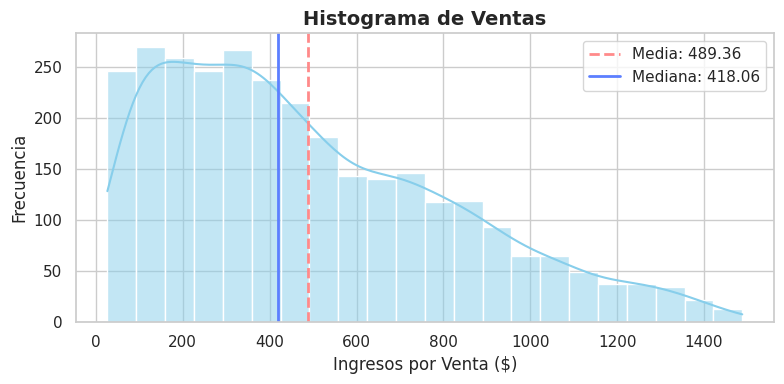

In [36]:
# Histograma ventas

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.histplot(ventas_clean['ingreso'], bins="auto", kde=True, color="skyblue")

media = ventas_clean['ingreso'].mean()
mediana = ventas_clean['ingreso'].median()

plt.axvline(x=media, color='#FF8A8A', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(x=mediana, color='#5C7FFF', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.title("Histograma de Ventas", fontsize=14, fontweight="bold")
plt.xlabel("Ingresos por Venta ($)")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()


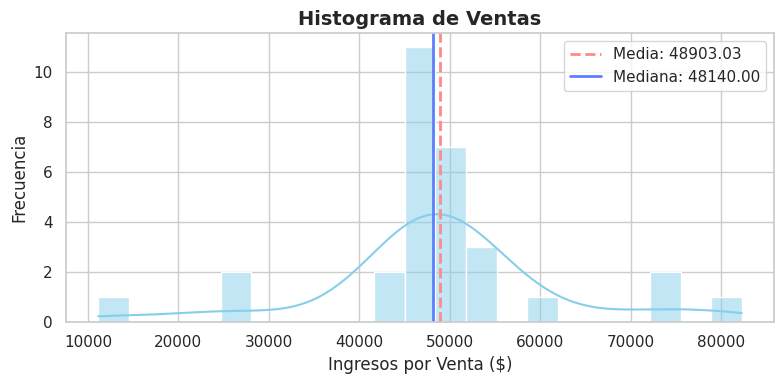

In [37]:
# Histograma ventas por producto
media = resumen_ventas['ingreso_total'].mean()
mediana = resumen_ventas['ingreso_total'].median()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.histplot(resumen_ventas['ingreso_total'], bins="auto", kde=True, color="skyblue")

plt.axvline(x=media, color='#FF8A8A', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(x=mediana, color='#5C7FFF', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.title("Histograma de Ventas", fontsize=14, fontweight="bold")
plt.xlabel("Ingresos por Venta ($)")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
# Agrupamos las ventas por producto
resumen_ventas2 = resumen_ventas[['producto','ingreso_total']].sort_values(by='ingreso_total', ascending=False)

fig_c = px.bar(resumen_ventas2, x='producto',y='ingreso_total',
               title="Total Vendido por Producto",
               labels={
                   "producto": "Producto",
                   "ingreso_total": "Ingreso Total"})

fig_c.update_layout(
    xaxis_tickangle=-90)

fig_c.update_traces(marker_color= '#ADCCED')

fig_c.show()

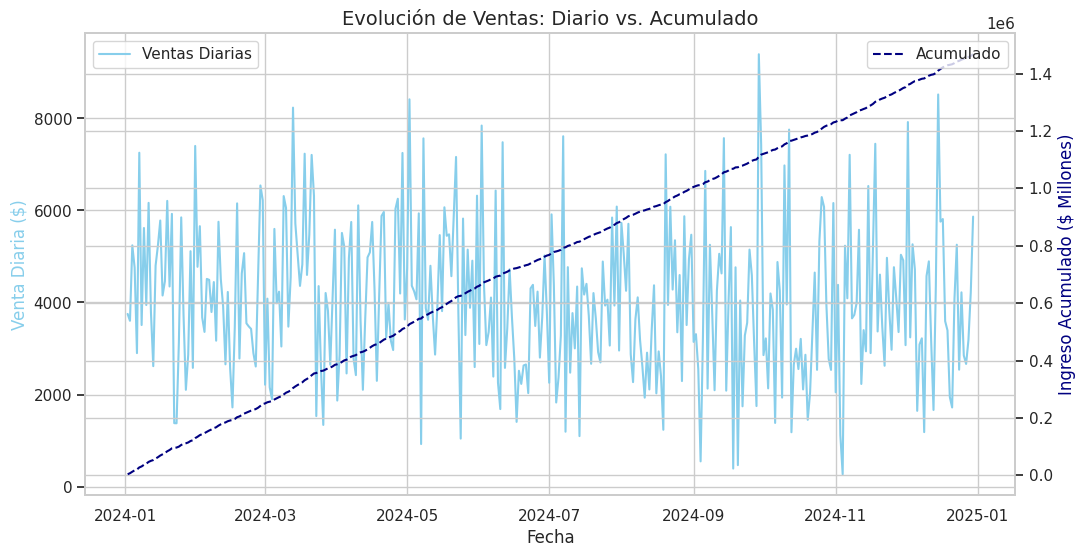

In [39]:
#Grafico de ventas diarias y ventas acumuladas

ventas_diarias = (ventas_clean.
                  groupby(['fecha_venta'], dropna=False, as_index=False, observed=False).
                  agg(ingreso = ('ingreso', 'sum')))
ventas_diarias['ingreso_acumulado'] = ventas_diarias['ingreso'].cumsum()

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=ventas_diarias, x="fecha_venta", y="ingreso",ax=ax1,color="skyblue", label="Ventas Diarias")
ax2 = ax1.twinx()
sns.lineplot(data=ventas_diarias, x="fecha_venta", y="ingreso_acumulado", ax=ax2, color="navy", linestyle="--", label="Acumulado")

ax1.set_title("Evolución de Ventas: Diario vs. Acumulado", fontsize=14)
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Venta Diaria ($)", color="skyblue")
ax2.set_ylabel("Ingreso Acumulado ($ Millones)", color="navy")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

In [41]:
df_vtas = (ventas_clean.assign(mes = ventas_clean['fecha_venta'].dt.month).
           groupby(['mes'],dropna=False, as_index=False, observed=False).
           agg(ingreso_mensual = ('ingreso', 'sum'))
           )


fig = px.bar(df_vtas, x="mes", y="ingreso_mensual",
             title="Ventas por mes",
             labels={
                   "mes": "Mes",
                   "ingreso_mensual": "Ingreso Mensual"})

fig.update_traces(marker_color= '#ADCCED')

fig.show()

In [42]:
#Evolucion de Ventas mensuales

fig1 = px.line(df_vtas, x="mes", y="ingreso_mensual",
               title="Ventas por mes",
               labels={
                   "mes": "Mes",
                   "ingreso_mensual": "Ingreso Mensual"})

fig1.update_traces(marker_color= '#2798F5')

fig1.show()


In [43]:
#boxplot de ingresos por ventas

box1 = px.box(ventas_clean, x="ingreso",
              title="Boxplot Ventas",
              labels={"ingreso": "Ingreso por venta ($)"})

box1.update_traces(marker_color= '#2798F5')
box1.show()

In [44]:
#Boxplot de ingresos por producto

box2 = px.box(resumen_ventas_marketing, x="ingreso_total",
              title="Boxplot de ingresos por productos",
              labels={"ingreso_total": "Ingreso por venta ($)"})

box2.update_traces(marker_color= '#2798F5')
box2.show()

In [45]:
#boxplot por categoria de producto

box3 = px.box(ventas_clean, x="categoria", y="ingreso",  color="categoria",
              title="Boxplot de ingresos por Categoria de Producto",
              labels={"ingreso": "Ingreso por venta ($)",
                      "categoria" : "Categoría"})

box3.show()

In [46]:
box4 = px.box(ventas_clean, x="producto", y="ingreso",  color="producto",
              title="Boxplot de ingresos por Producto",
              labels={"ingreso": "Ingreso por venta ($)",
                      "producto" : "Producto"})

box4.show()

In [47]:
# Datos Atípicos de ingresos por ventas
q1 = ventas_clean['ingreso'].quantile(0.25)
q3 = ventas_clean['ingreso'].quantile(0.75)
iqr = q3 - q1

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = ventas_clean.query("ingreso <= @lim_inf | ingreso >= @lim_sup")

print(outliers)

      id_venta               producto  precio  cantidad fecha_venta  \
248       2953             Smartphone  121.00      12.0  2024-01-29   
265       1481     Freidora Eléctrica  121.77      12.0  2024-01-31   
513       1569               Batidora  122.02      12.0  2024-02-29   
550       2063             Smartphone  124.01      12.0  2024-03-05   
866       2373             Smartphone  123.60      12.0  2024-04-07   
912       1109               Batidora  123.83      12.0  2024-04-11   
2119       467  Elementos De Cerámica  120.79      12.0  2024-09-06   
2345      2703             Smartphone  123.40      12.0  2024-10-03   
2657      1462               Heladera  121.56      12.0  2024-11-15   

              categoria  ingreso  
248         Electrónica  1452.00  
265   Electrodomésticos  1461.24  
513   Electrodomésticos  1464.24  
550         Electrónica  1488.12  
866         Electrónica  1483.20  
912   Electrodomésticos  1485.96  
2119         Decoración  1449.48  
2345     

In [101]:
# Datos Atípicos deingresos por producto
q1_p = resumen_ventas_marketing['ingreso_total'].quantile(0.25)
q3_p = resumen_ventas_marketing['ingreso_total'].quantile(0.75)

iqr_p = q3_p - q1_p

lim_inf_p =  q1_p - 1.5 * iqr_p
lim_sup_p = q3_p + 1.5 * iqr_p

outliers_p = resumen_ventas_marketing.query("ingreso_total <= @lim_inf_p | ingreso_total >= @lim_sup_p").sort_values('ingreso_total', ascending=False)

print(outliers_p)

           producto  ingreso_total  total_unidades  precio_promedio  \
19  Lámpara De Mesa        82276.0          1112.0             73.0   
3       Auriculares        74176.0           958.0             76.0   
20       Microondas        72563.0           912.0             79.0   
5          Cafetera        59607.0           765.0             79.0   
28           Tablet        25857.0           374.0             71.0   
14         Heladera        25737.0           330.0             74.0   
6        Candelabro        11129.0           160.0             75.0   

    costo_campaña  
19          15.93  
3           15.24  
20          14.19  
5           18.16  
28          12.72  
14          13.11  
6           14.65  


In [52]:
#Grafico de Ventas y marketing

ventas_diarias_prod = ventas_clean.groupby(['producto', 'fecha_venta'])['ingreso'].sum().reset_index()

lista_prod = ventas_clean['producto'].unique()

selector_producto = widgets.Dropdown(options = lista_prod,
                            #value='Cuadro Decorativo',
                            description='Producto:',
                            style={'description_width': 'initial'})
grafico_marketing_ventas(ventas_diarias_prod, marketing_clean, selector_producto.value)

widgets.interact(
    grafico_marketing_ventas,
    ventas=widgets.fixed(ventas_diarias_prod),
    marketing=widgets.fixed(marketing_clean),
    nombre_producto=selector_producto)

#no me salio bien el grafico (se duplica y achica si se cambia de producto), intente seguir la guia 15 de dashboard pero no lo logré :(


interactive(children=(Dropdown(description='Producto:', options=('Cuadro Decorativo', 'Lámpara De Mesa', 'Seca…

### 1️⃣0️⃣ Correlación

In [50]:
#Grafico de correlacion

fig_3 = px.scatter(resumen_ventas, x="total_unidades", y="precio_promedio",
           title="Distribución Precios x Cantidad",
           labels={
               "precio_promedio": "Precio Promedio",
               "total_unidades": "Unidades Vendidas"})


fig_3.update_traces(marker_color= '#36404A')


In [51]:
# Correlacion entre precio-cantidad
correlacion = resumen_ventas[['precio_promedio', 'total_unidades']].corr()
print(f'La correlacion entre las variables es de: {round(correlacion.loc['precio_promedio', 'total_unidades'],2)}')

La correlacion entre las variables es de: 0.22


## 📑📈 Presentación Final y Conclusiones

---

### **Metodología y Flujo de Trabajo**

**1) Carga y Calidad de Datos**

Se procedió a la carga y exploración inicial de los datasets (ventas, productos, marketing). Se realizó un Análisis Exploratorio de Datos preliminar para evaluar dimensiones, tipos de variables y estadística descriptiva básica. Para garantizar la calidad de la información, se ejecutó una limpieza de las tablas de datos: detección y eliminación de duplicados, eliminación de valores nulos y normalización de formatos (carácter, numérico y fecha).

**2) Transformación y Procesamiento**

Con los datos corregidos, se generaron nuevos datos para potenciar el análisis:
* Nuevas variables: Creación de la variable ingreso (Precio X Cantidad).
* Agregaciones: nuevas tablas agrupadas por categoría y producto.
* Integración: Merge de las tablas de ventas con las campañas de marketing.

**3) Análisis Exploratorio y Visualización**

Se aplicaron herramientas estadísticas y de visualización para identificar patrones:
* Técnicas de estadística descriptiva (medidas de tendencia central y dispersión)
* Distribución de datos (ventas de productos).
* Evolucion de ventas en el tiempo (diaria y mensual).
* Detección de outliers mediante Boxplots (desagregado y por categoría/producto).
* Analisis de correlación entre precio y cantidad.
* Impacto preliminar de las campañas de marketing sobre el volumen de ventas.

---

### **Principales Resultados**


* **Ingresos Totales:** El ingreso anual acumulado por ventas ascendió a **\$1.467.091**.
* **Volumen:** Se comercializaron un total de **30 productos** diferentes, agrupados en 3 categorías principales.

| Categoría | Ingreso Total | Unidades Vendidas | Precio Promedio |
| :------ | :------: | :------: | :------: |
| **Decoración** | \$479.216 | 6.490 | \$74 |
| **Electrodomésticos** | \$505.300 | 6.592 | \$77 |
| **Electrónica** | \$482.578 | 6.413 | \$75 |

* **Estadística Descriptiva:** Las ventas por producto presentaron una media de **\$48.903**, con una desviación estándar de **\$13.265** y un rango que oscila entre 11.129 -82.276.

* **Comportamiento Temporal:**
    * Las ventas diarias muestran una alta volatilidad, aunque la tendencia acumulada se mantiene positiva y constante a lo largo del año.
    * Las ventas mensuales presentaron su pico máximo se registró en **mayo** (\$143.000) y el mínimo en **junio** (\$108.000).

* **Datos Atípicos (Outliers):** Se identificaron valores extremos en el rendimiento de los siguientes productos:

| Producto | Ingreso Total | Total Unidades | Precio Promedio |
| :--- | :---: | :---: | :---: |
| **Lámpara De Mesa** | \$82.276 | 1.112 | \$74 |
| **Auriculares** | \$74.176 | 958 | \$77 |
| **Microondas** | \$72.563 | 912 | \$79 |
| **Cafetera** | \$59.607 | 765 | \$77 |
| **Tablet** | \$25.857 | 374 | \$69 |
| **Heladera** | \$25.737 | 330 | \$78 |
| **Candelabro** | \$11.129 | 160 | \$69 |

* **Distribución de Datos:** La distribución de ventas brutas diarias presenta sesgo positivo (Media: 489 > Mediana: 418). Sin embargo, al agrupar por producto, los datos se ajustan a una distribución normal (simétrica), con una media de 48.903 y mediana de 48.140.

* **Correlación:** Existe una correlación positiva débil entre los precios promedio y las cantidades vendidas (R = 0,22), lo que sugiere que el precio no es el único determinante del volumen en este set de datos.

* **Marketing:** Se ejecutaron campañas en 3 canales (TV, Email y RRSS) con una inversión total de **\$443.58**. No se encontró evidencia  significativa sobre el impacto directo de estas campañas en las ventas, posiblemente debido a la falta de métricas de atribución (ej. Tasa de Conversión).
